In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [ ]:
print("Doğru maskelenmiş yüz görüntülerinin sayısı:",len(os.listdir('/content/drive/MyDrive/face-mask-detect/Dataset/Correctly_Mask')))
print("Yanlış maskelenmiş yüz görüntülerinin sayısı:",len(os.listdir('/content/drive/MyDrive/face-mask-detect/Dataset/Incorrectly_Mask')))
print("Maskesiz yüz görüntülerinin sayısı:",len(os.listdir('/content/drive/MyDrive/face-mask-detect/Dataset/No_Mask')))

Doğru maskelenmiş yüz görüntülerinin sayısı: 962
Yanlış maskelenmiş yüz görüntülerinin sayısı: 955
Maskesiz yüz görüntülerinin sayısı: 953


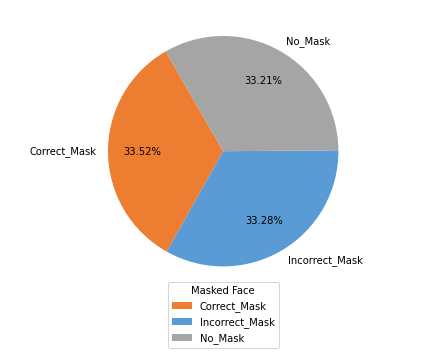

In [1]:
from matplotlib import pyplot as plt
import numpy as np
colors = ['#ed7d31','#5b9bd5','#a5a5a5']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ["Correct_Mask", "Incorrect_Mask", "No_Mask"]
data = [962, 955, 953]
ax.pie(data, labels = langs,autopct='%1.2f%%',colors=colors,pctdistance=0.7,startangle=120)
textprops=({'fontsize': 14,'color':"#003366"})
ax.legend(
          title ="Masked Face",
          loc ="lower center",
          bbox_to_anchor =(0.1, -0.2, 0.8, 1))
plt.show()


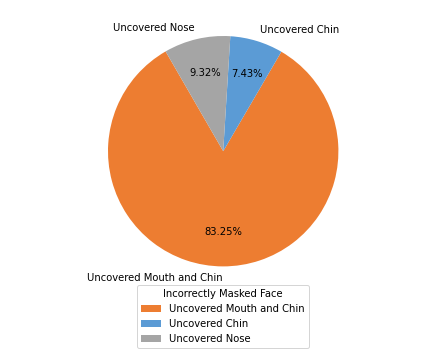

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
colors = ['#ed7d31','#5b9bd5','#a5a5a5']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ["Uncovered Mouth and Chin", "Uncovered Chin", "Uncovered Nose"]
idata = [795, 71, 89]
ax.pie(idata, labels = langs,autopct='%1.2f%%',colors=colors,pctdistance=0.7,startangle=120)
textprops=({'fontsize': 14,'color':"#003366"})
ax.legend(
          title ="Incorrectly Masked Face",
          loc ="lower center",
          bbox_to_anchor =(0.1, -0.2, 0.8, 1))
plt.show()

962
955


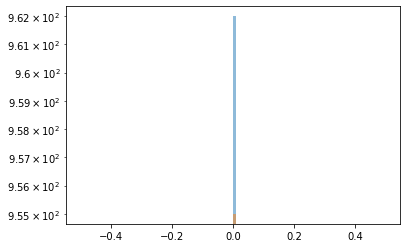

In [ ]:
from PIL import Image
import math
import matplotlib.pyplot as plt
import random
import numpy as np

def aspect_ratio_histogram(folder_path, bins=None):
    aspect_ratios = []
    images_path = list(folder_path.glob("*.jpg"))
    random.shuffle(images_path)
    print(len(images_path))
    for image_path in images_path:
        image = np.asarray(Image.open(str(image_path)))
        assert(len(image.shape)==3) # (W, H, C)
        # aspect_ratios.append(image.shape[0] / image.shape[1])
        aspect_ratios.append(math.log10(image.shape[0] / image.shape[1]))
    aspect_ratios = np.asarray(aspect_ratios)
    n, bins, patches = plt.hist(aspect_ratios, bins=bins, log=True, alpha=0.5)
    return bins

from pathlib import Path
co_path = Path("/content/drive/MyDrive/face-mask-detect/Dataset/Correctly_Mask")
in_path = Path("/content/drive/MyDrive/face-mask-detect/Dataset/Incorrectly_Mask")
no_path = Path("/content/drive/MyDrive/face-mask-detect/Dataset/No_Mask")
bins = aspect_ratio_histogram(co_path, bins=100)
aspect_ratio_histogram(in_path, bins=bins)
plt.savefig('aspect_ratio_histogram.png')